# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

### Answer to the weekly graph question


**Pros and cons of these two representations**

Both graphs highlight different aspects of the drug prices the pharmacy sells. The histogram represents the overall price distribution, making it easy to see where most drug prices fall – around $1-$5. This is not surprising, as these drugs may be generic and more commonly used by the population. However, the histogram’s advantage becomes a disadvantage when separating out outliers is necessary. Another issue is bin size. While the current bin size works well, changing it could distort the interpretation because more bins would make the distribution look overly smooth, conversely, fewer bins might make it appear too jumpy.

The boxplot addresses both of these cons. First, it clearly establishes the median price by splitting the box into two (uneven) parts, helping the administrator easily identify outliers and distinguish quartiles. Further, unlike the histogram, the boxplot is not affected by bin size because it relies on quartiles rather than grouped bins.

**My choice**

Since both graphs complement each other in providing a full representation of the pharmacy’s drug prices, I would ideally use both. However, if I had to choose only one, I would pick the boxplot because it is more effective in answering the administrator’s question about how much the more expensive drugs tend to cost. The boxplot explicitly shows the range of drug prices, highlights extreme values (outliers), and provides a clear summary of the median and quartiles. This makes it easier to understand the cost of high-priced drugs relative to the rest of the distribution, something the histogram does not show as clearly. 

See the modified boxplot below.

In [119]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

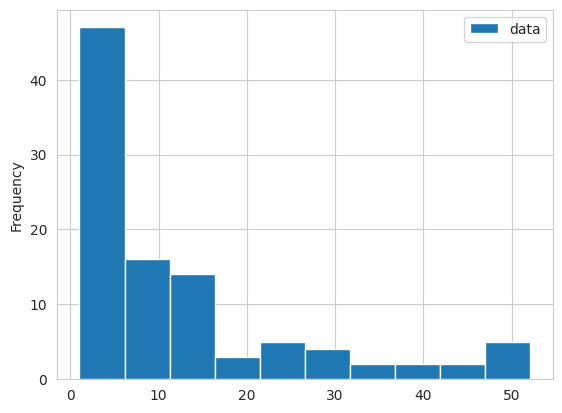

In [120]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

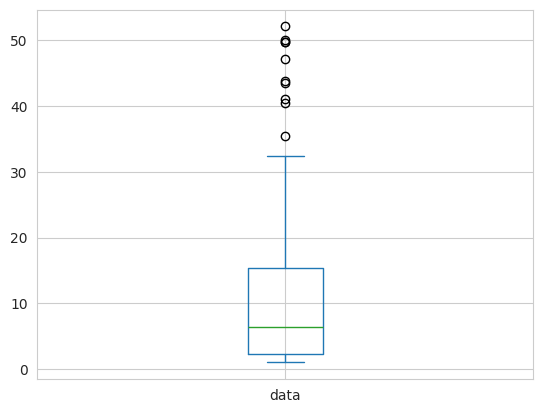

In [121]:
df.plot.box()

**The boxplot formatting modification to make it more visually interesting, clear, or informative**

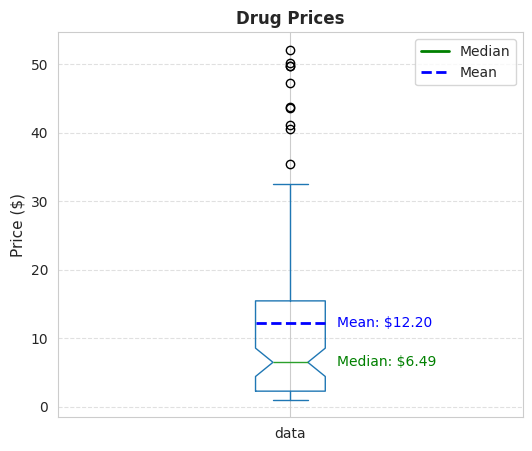

In [122]:
import matplotlib.pyplot as plt

# Data
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

# Create boxplot
ax = df.plot.box(figsize=(6, 5), notch=True, showmeans=True, 
meanline=True, meanprops={"color": "blue", "linestyle": "--", "linewidth": 2})

# Median and mean
median_value = df["data"].median()
mean_value = df["data"].mean()

ax.text(1.10, median_value, f"Median: ${median_value:.2f}", 
        va='center', fontsize=10, color='green')
ax.text(1.10, mean_value, f"Mean: ${mean_value:.2f}", 
        va='center', fontsize=10, color='blue')

# Add labels and title
ax.set_title("Drug Prices", fontsize=12, fontweight='bold')
ax.set_ylabel("Price ($)", fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.6) 

# Add legend
legend_labels = ["Median", "Mean"]
legend_handles = [
    plt.Line2D([0], [0], color='green', lw=2),
    plt.Line2D([0], [0], color='blue', linestyle='--', lw=2)  
]
ax.legend(legend_handles, legend_labels, loc="upper right")

plt.show()


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

## Capstone Project: Analyzing Unrelated Datasets in Fraud Detection



For the capstone project, I chose Auto Insurance Fraud Detection. It contains three unrelated datasets: 
1. Vehicle Insurance Fraud Detection: https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection/data
2. Insurance claims: https://data.mendeley.com/datasets/992mh7dk9y/2
3. Car Parts and Car Damages: https://www.kaggle.com/datasets/humansintheloop/car-parts-and-car-damages/data

- For context, the listed datasets focus on fraud detection, but they originate from different sources and do not share common features.
- The Car Parts and Car Damages dataset is not part of the analysis at this stage because it consists of images used to train visual recognition models. This level of analysis goes beyond the current course material. However, this dataset will be revisited later in the course when working with visual data is introduced.

**Dataset description**

### **1. Vehicle Insurance Fraud Detection**
- Source: https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection/data

- The dataset represents automobile insurance information, which is publically available and is provided by Angoss Knowledge Seeker. 

- For context, Angoss KnowledgeSEEKER is a data mining and predictive analytics software developed by Angoss, a company specializing in analytics solutions. The software offers features such as data profiling, visualization, and decision tree analysis, enabling users to extract insights from large datasets without extensive coding. Angoss Software Corporation, a provider of this predictive analytics software, was acquired by Datawatch Corporation in 2018.

- The dataset contains 15,420 samples collected between January 1994 and December 1996, with 14,497 legitimate cases and 923 fraudulent ones, indicating a high class imbalance.

- Although the dataset originates from the 90s, it continues to be used in modern research: "Automobile insurance fraud detection using data mining: A systematic literature review" (https://www.sciencedirect.com/science/article/pii/S2667305324000164#br0710); "Empirical oversampling threshold strategy for machine learning performance optimisation in insurance fraud detection" (https://thesai.org/Publications/ViewPaper?Volume=11&Issue=10&Code=IJACSA&SerialNo=54); "Detecting fraudulent insurance claims using random forests and synthetic minority oversampling technique" (https://ieeexplore.ieee.org/document/9036162).





Before visualizing the datasets, as instructed for HW4, a few checks were run for info, duplicates, and missing values. 

In [123]:
# Per findings below, most of the data appears to be categorical, and there are no duplicates or missing values
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")
fraud_df.sum


<bound method DataFrame.sum of       Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthC

In [124]:
# Since the dataset contains different data types, the summary is split by type
fraud_df.select_dtypes(include=['object']).info()  
fraud_df.select_dtypes(include=['int64', 'float64']).info()  
fraud_df.select_dtypes(include=['bool']).info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   DayOfWeek             15420 non-null  object
 2   Make                  15420 non-null  object
 3   AccidentArea          15420 non-null  object
 4   DayOfWeekClaimed      15420 non-null  object
 5   MonthClaimed          15420 non-null  object
 6   Sex                   15420 non-null  object
 7   MaritalStatus         15420 non-null  object
 8   Fault                 15420 non-null  object
 9   PolicyType            15420 non-null  object
 10  VehicleCategory       15420 non-null  object
 11  VehiclePrice          15420 non-null  object
 12  Days:Policy-Accident  15420 non-null  object
 13  Days:Policy-Claim     15420 non-null  object
 14  PastNumberOfClaims    15420 non-null  object
 15  AgeOfVehicle          15420 non-null

In [125]:
# 0 means no missing values found
fraud_df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [126]:
# PolicyNumber appears to be a customer identifier, as its count matches the total number of rows in the dataset
fraud_df['PolicyNumber']

0            1
1            2
2            3
3            4
4            5
         ...  
15415    15416
15416    15417
15417    15418
15418    15419
15419    15420
Name: PolicyNumber, Length: 15420, dtype: int64

In [ ]:
# Each PolicyNumber is unique, no duplicates found
fraud_df[fraud_df['PolicyNumber'].duplicated(keep=False)]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound


**Visualizations for Vehicle Insurance Fraud Detection Dataset**

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

**1.1 Drawing histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot)**

Considerations:
1. Drawing swarm plots for numerical columns was impractical for this dataset because they took an excessive amount of time to generate.
2. The dataset contains multiple columns that don’t benefit from swarm, KDE, or violin plots. They were included as required per this home assignment, but they provide little practical value for this particular dataset. For example, plotting PolicyNumber, RepNumber, or Year provides no meaningful insight, whereas Age is clearly represented in these types of graphs. Based on further analysis in the following Section 1.2, grouped graphs appear to have more practical value as they show noticeable patterns.

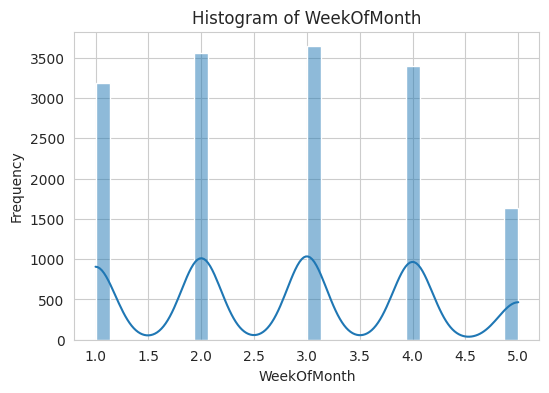

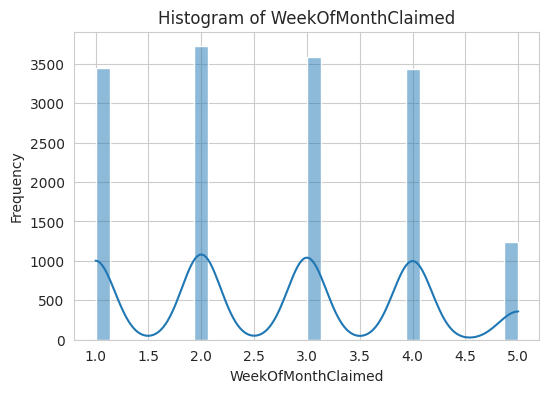

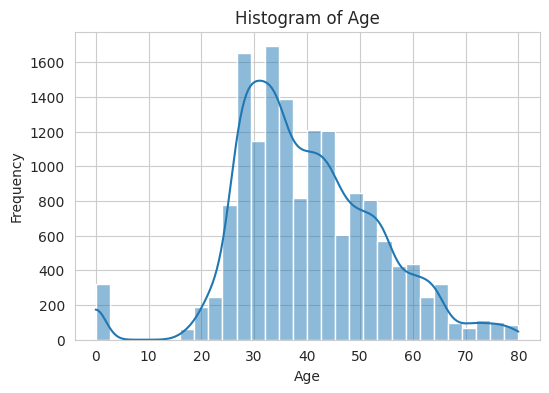

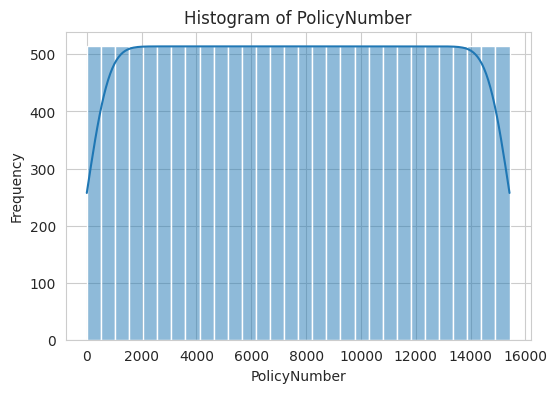

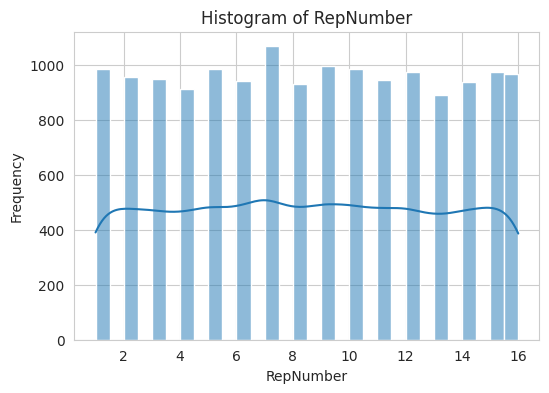

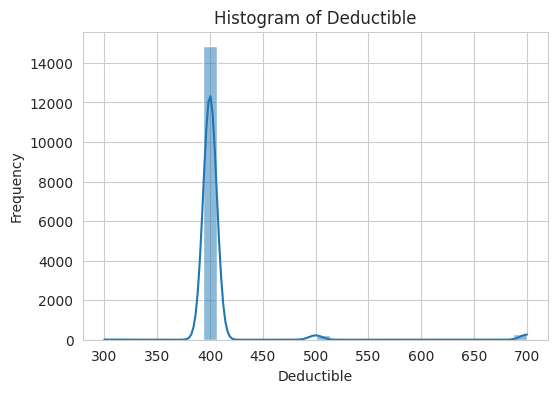

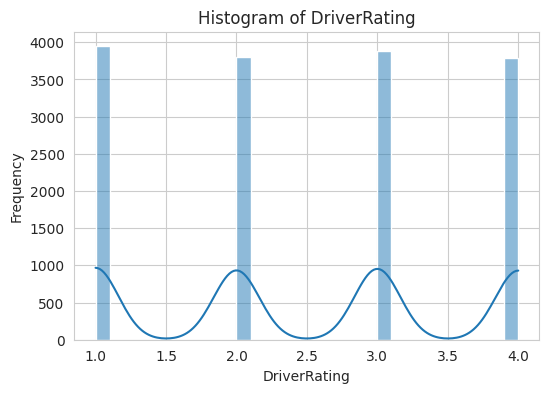

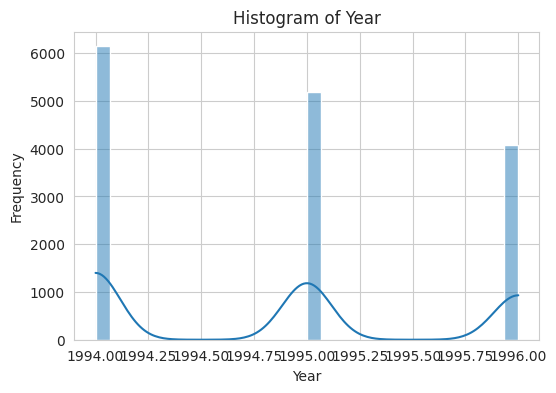

In [ ]:
# Separate numerical and categorical columns
numerical_cols = fraud_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = fraud_df.select_dtypes(include=['object']).columns

# Set plot style
sns.set_style("whitegrid")

# Draw histograms for numerical Columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(fraud_df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

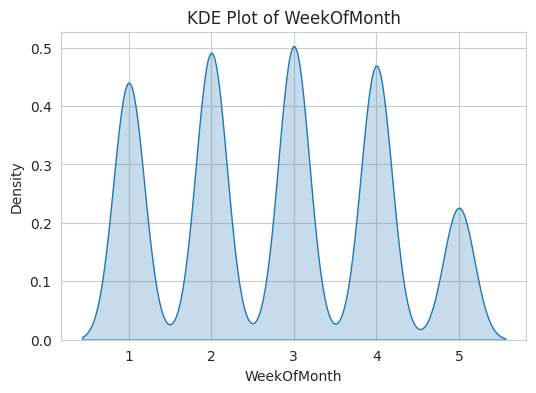

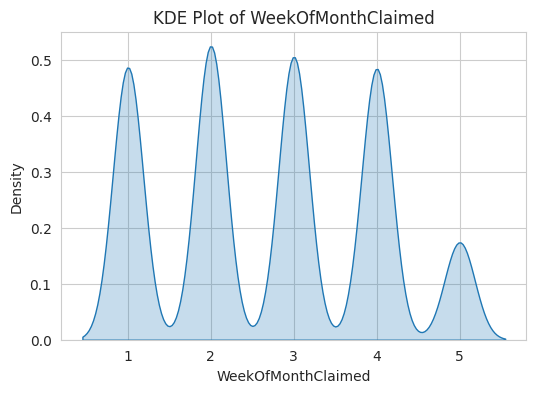

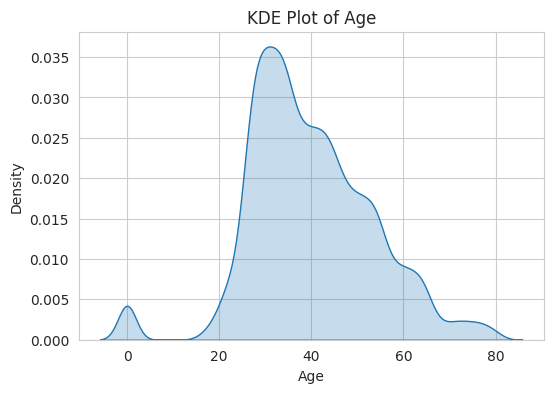

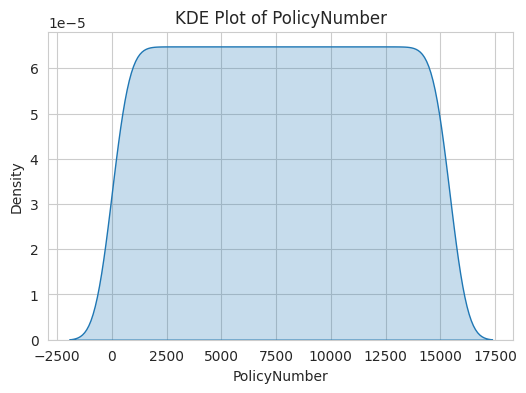

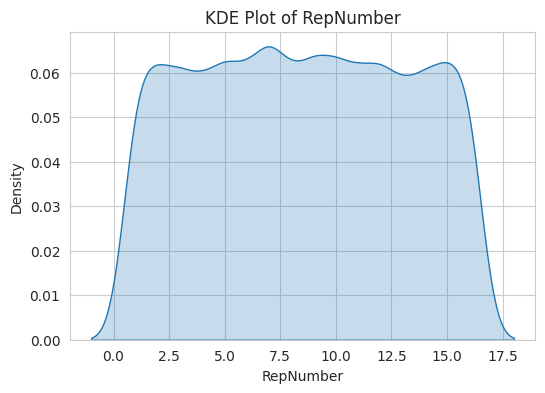

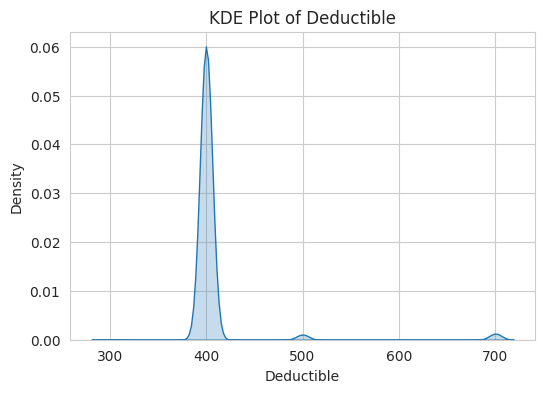

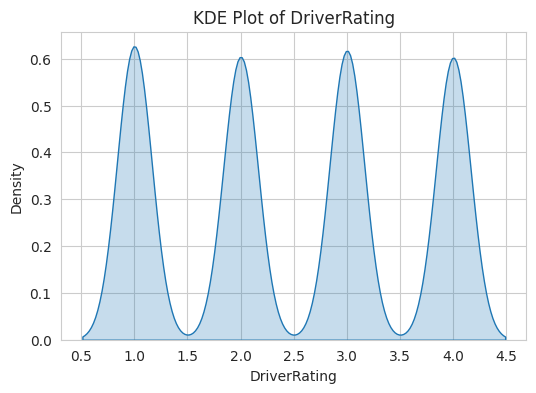

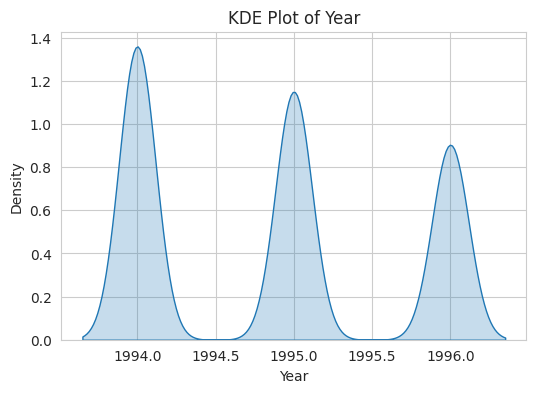

In [130]:
# Draw KDE plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(fraud_df[col], fill=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


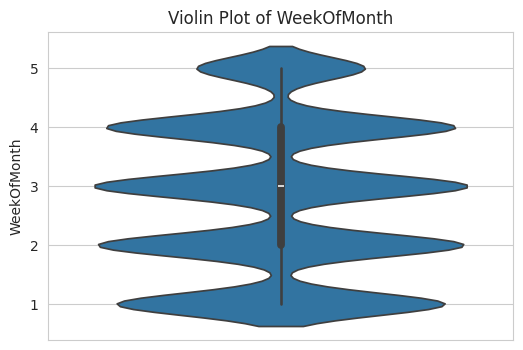

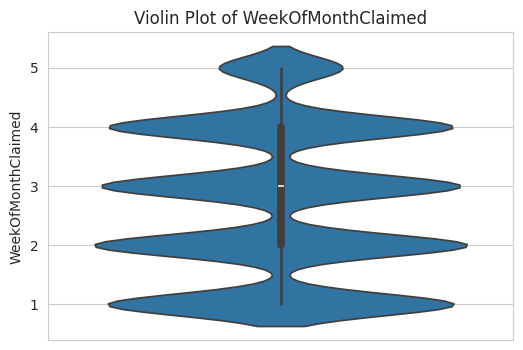

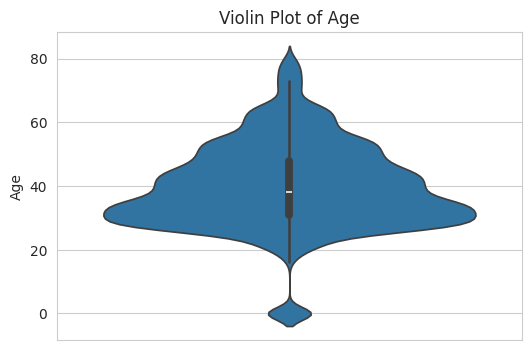

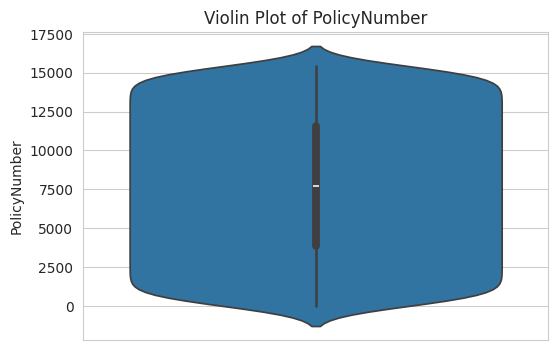

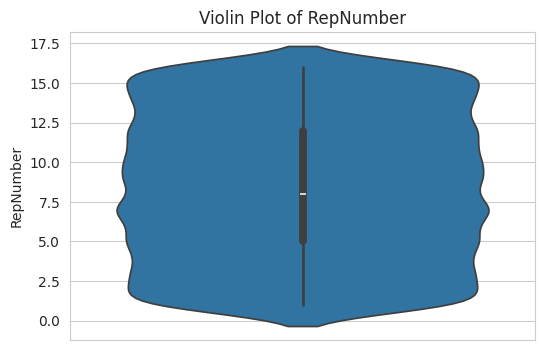

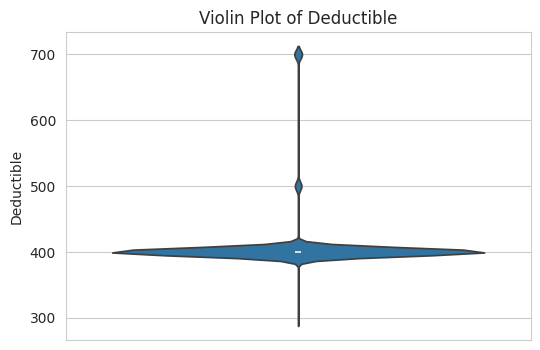

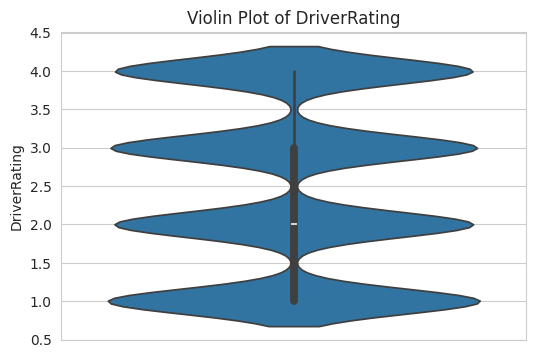

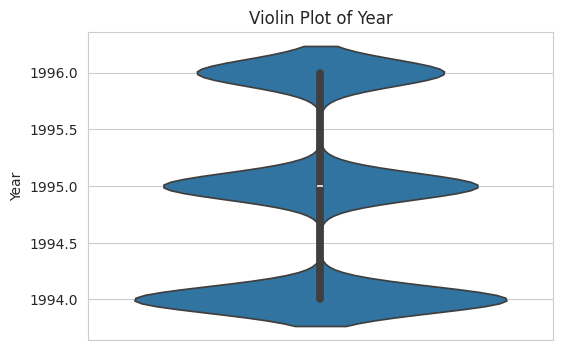

In [131]:
# Draw violin plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(y=fraud_df[col])
    plt.title(f"Violin Plot of {col}")
    plt.ylabel(col)
    plt.show()


**1.2 Drawing grouped histograms**

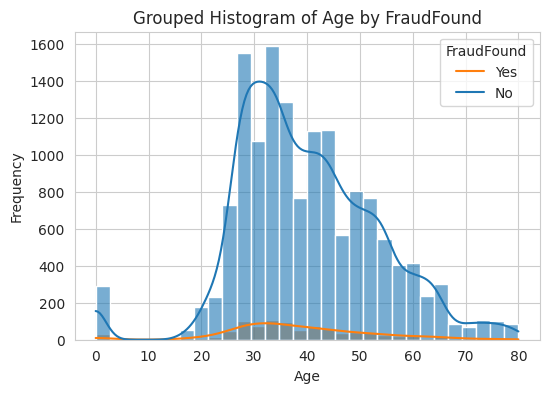

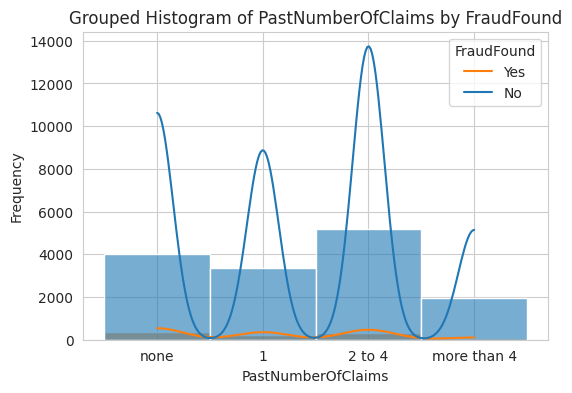

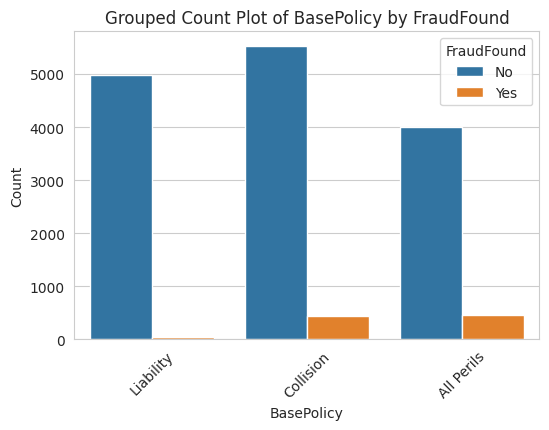

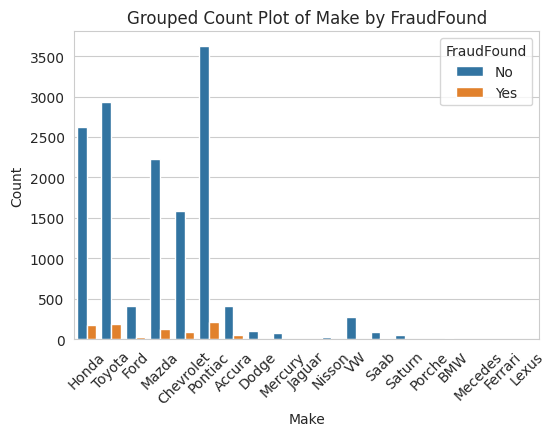

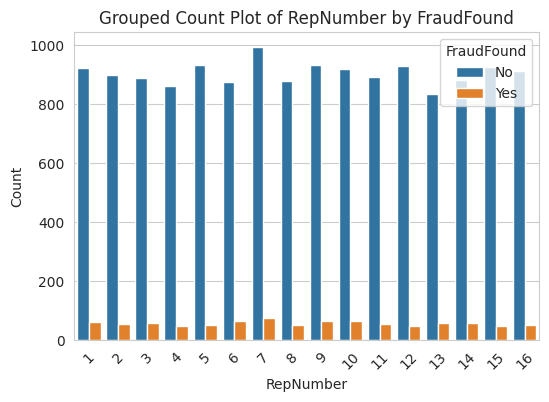

In [132]:
numerical_cols = ["Age", "PastNumberOfClaims"]
categorical_cols = ["BasePolicy", "Make", "RepNumber"]
group_col = "FraudFound" 

# Convert group column to string for visualization
fraud_df[group_col] = fraud_df[group_col].astype(str)

# Plot grouped histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=fraud_df, x=col, hue=group_col, kde=True, bins=30, alpha=0.6)
    plt.title(f"Grouped Histogram of {col} by {group_col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(labels=["Yes", "No"], title=group_col)
    plt.show()


# Plot grouped bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=fraud_df, x=col, hue=group_col)
    plt.title(f"Grouped Count Plot of {col} by {group_col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(labels=["No", "Yes"], title=group_col)
    plt.xticks(rotation=45)  
 
plt.show()


In [ ]:
# The first graph showed that some rows have Age recorded as 0  
# There are 320 rows where Age is 0  
fraud_df[fraud_df["Age"] == 0].shape[0]

320

In [ ]:
# The 0 values in the Age column may not be true missing values, as the Age of Policyholder is recorded as 16-17
# This could indicate that the driver is a dependent (learner’s permit holder) 
fraud_df[fraud_df["Age"] == 0][["Age", "AgeOfPolicyHolder"]]

,Age,AgeOfPolicyHolder
7,0,16 to 17
13,0,16 to 17
28,0,16 to 17
31,0,16 to 17
58,0,16 to 17
...,...,...
15243,0,16 to 17
15262,0,16 to 17
15274,0,16 to 17
15379,0,16 to 17


In [ ]:
# Although 320 rows with Age = 0 do not make up a large percentage of the dataset, they should be analyzed against FraudFound values to check for any patterns 
fraud_zero_age = fraud_df[fraud_df["Age"] == 0]["FraudFound"].value_counts()

# There are 31 fraudulent claims from this age group
print(fraud_zero_age)

FraudFound
No     289
Yes     31
Name: count, dtype: int64


In [ ]:
fraud_rate_zero_age = fraud_df[fraud_df["Age"] == 0]["FraudFound"].value_counts(normalize=True) * 100
fraud_rate_all = fraud_df["FraudFound"].value_counts(normalize=True) * 100

print("Fraud Rate for Age = 0:")
print(fraud_rate_zero_age.round(2).astype(str) + "%")  

print("\nFraud Rate for Entire Dataset:")
print(fraud_rate_all.round(2).astype(str) + "%")  

Fraud Rate for Age = 0:
FraudFound
No     90.31%
Yes     9.69%
Name: proportion, dtype: object

Fraud Rate for Entire Dataset:
FraudFound
No     94.01%
Yes     5.99%
Name: proportion, dtype: object


Observation of the Age = 0 and FraudFound Comparison.

The fraud rate for Age = 0 is 9.69%, which is higher than the overall fraud rate of 5.99%. This suggests that cases where the driver’s age is recorded as 0 may have a greater likelihood of fraud compared to the general dataset. Possible explanations include data entry errors, misrepresentation, or a pattern of fraudulent claims involving young or unidentified drivers.

**1.3 Drawing a bar plot to indicate total counts of each categorical variable in a given column**



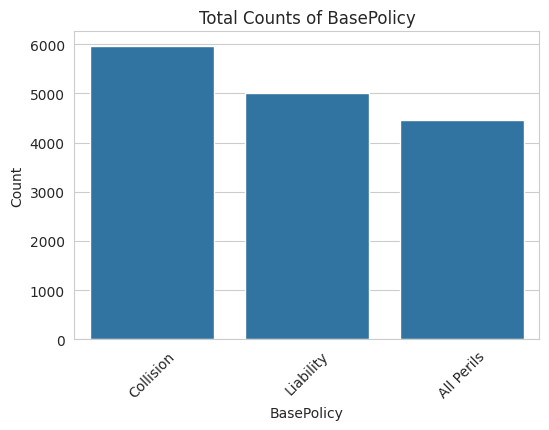

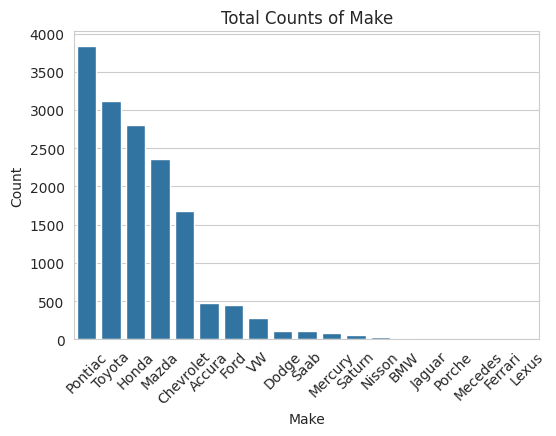

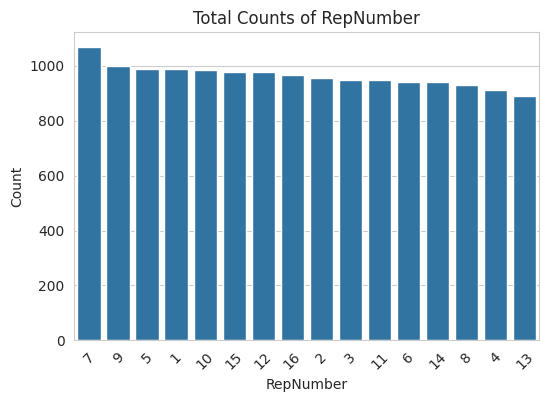

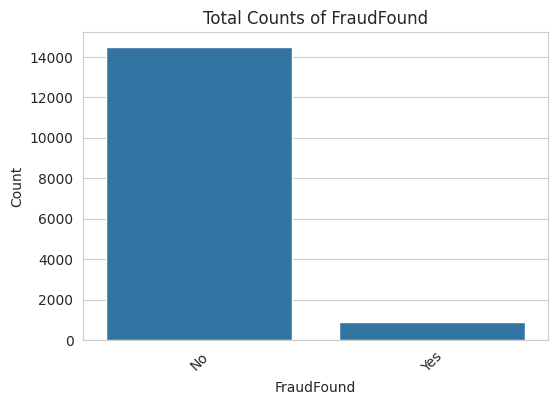

In [137]:
# Since the task does not specify which column should be used, a reasonable approach would be to focus on the columns plotted above
categorical_cols = ["BasePolicy", "Make", "RepNumber", "FraudFound"]

# Plot bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=fraud_df, x=col, order=fraud_df[col].value_counts().index)
    plt.title(f"Total Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45) 
    plt.show()

**1.4 Mean, median, and mode**

In [ ]:
# Separate numerical and categorical columns
numerical_cols = fraud_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = fraud_df.select_dtypes(include=['object']).columns

# Mean, median, and mode for numerical columns
numerical_stats = pd.DataFrame({
    "Mean": fraud_df[numerical_cols].mean(),
    "Median": fraud_df[numerical_cols].median(),
    "Mode": fraud_df[numerical_cols].mode().iloc[0]  
})

# Mode for categorical columns
categorical_modes = fraud_df[categorical_cols].mode().iloc[0]  


print("Numerical Statistics:")
print(numerical_stats)

print("\nCategorical Modes:")
print(categorical_modes.to_frame(name="Mode"))

Numerical Statistics:
                           Mean  Median    Mode
WeekOfMonth            2.788586     3.0     3.0
WeekOfMonthClaimed     2.693969     3.0     2.0
Age                   39.855707    38.0    30.0
PolicyNumber        7710.500000  7710.5     1.0
RepNumber              8.483268     8.0     7.0
Deductible           407.704280   400.0   400.0
DriverRating           2.487808     2.0     1.0
Year                1994.866472  1995.0  1994.0

Categorical Modes:
                                   Mode
Month                               Jan
DayOfWeek                        Monday
Make                            Pontiac
AccidentArea                      Urban
DayOfWeekClaimed                 Monday
MonthClaimed                        Jan
Sex                                Male
MaritalStatus                   Married
Fault                     Policy Holder
PolicyType            Sedan - Collision
VehicleCategory                   Sedan
VehiclePrice           20,000 to 29,000
Days:P

### Conclusions for Vehicle Insurance Fraud Detection Dataset:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

**Answer:** Yes, this dataset is comprehensive and well-structured, making it suitable for further analysis. It contains a mix of numerical and categorical features that can be  compared against the FraudFound column to identify potential fraud patterns. The data appears complete, as it does not have missing values or inconsistencies, which increases its usability for modeling and insights.

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

**Answer:** The overall shape of the dataset is not normal due to asymmetry. For example, the Age distribution is right-skewed, with a peak around 30-35 and a gradual decline in older ages, after 50.

- Are there any outliers present?  (Data points that are far from the others.)

**Answer:** Yes, there are clear outliers in the dataset. One notable outlier is Age = 0, which is unexpected and may indicate data entry errors, misrepresentation, or an anomaly in fraud claims. Notably, this group has a fraud rate of 9.69%, higher than the overall rate of 5.99%, suggesting a greater likelihood of fraud. Further, the histogram shows a clear jump in the number of claims after Age 20, peaking around the 30-35 age range, which aligns with the most active group in the dataset.

- If there are multiple related histograms, how does the distribution change across different groups?

**Answer:** No multiple related histograms. While the Age and AgeOfPolicyHolder columns may seem like related histograms at first glance, they do not provide meaningful insights when compared. Age is a continuous variable, while AgeOfPolicyHolder is categorical (16 to 17, 31 to 35, etc.), making direct distribution comparisons difficult. Also, since AgeOfPolicyHolder represents predefined age brackets rather than precise ages, analyzing it alongside Age does not add significant value for fraud detection.

- What are the minimum and maximum values represented in each histogram?

**Answer:** The minimum and maximum values represented in each histogram vary by variable. In the Age histogram, the values range from 0 to approximately 80, with a peak around 30-40. In the PastNumberOfClaims histogram, the range is categorical, from "none" to "more than 4". Other categorical variables such as Make and BasePolicy do not have numerical min/max values but instead represent different category counts.

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

**Answer:** The choice of bin size significantly affects how histograms display patterns in the data. In the Age histogram, using fewer bins (10) smooths the distribution but hides details such as small peaks or outliers. Using more bins (50) reveals fine details but makes the histogram look noisy and harder to interpret. It appears that the original binning (30) provided a balance, clearly showing the right-skewed distribution.

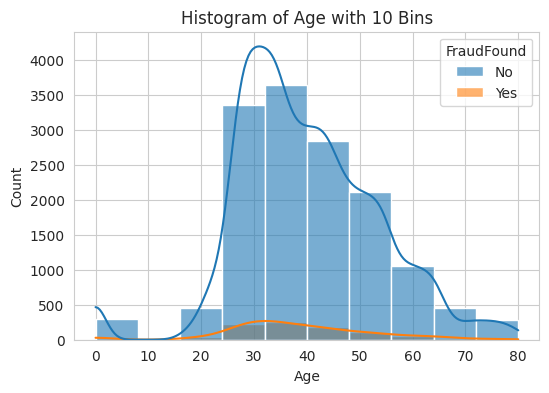

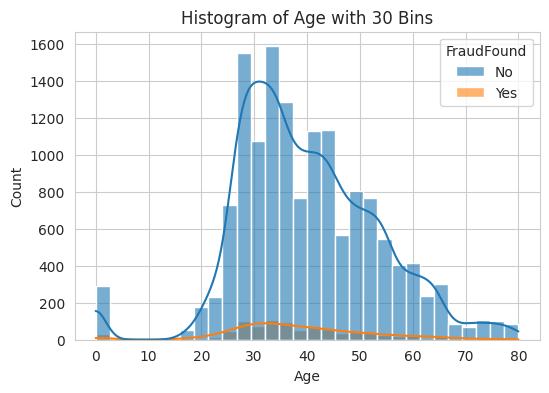

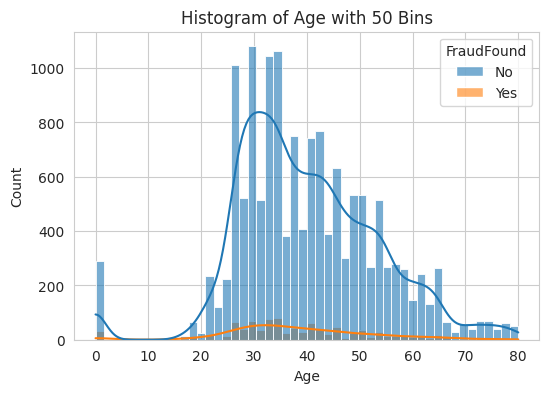

In [139]:
# Bin size comparison

# 10 bins
plt.figure(figsize=(6, 4))
sns.histplot(data=fraud_df, x="Age", hue="FraudFound", kde=True, bins=10, alpha=0.6)
plt.title("Histogram of Age with 10 Bins")
plt.show()

# 30 bins
plt.figure(figsize=(6, 4))
sns.histplot(data=fraud_df, x="Age", hue="FraudFound", kde=True, bins=30, alpha=0.6)
plt.title("Histogram of Age with 30 Bins")
plt.show()

# 50 bins
plt.figure(figsize=(6, 4))
sns.histplot(data=fraud_df, x="Age", hue="FraudFound", kde=True, bins=50, alpha=0.6)
plt.title("Histogram of Age with 50 Bins")
plt.show()


- Does the distribution appear normal, or does it have a different distribution?

**Answer:** The distributions in this dataset do not appear normal. The Age distribution is right-skewed, with most claims concentrated between 25-35 years old and a long tail extending toward older ages. The PastNumberOfClaims distribution is categorical rather than continuous, meaning normality does not apply. Both distributions deviate from a classic bell-shaped curve.

### **2. Insurance claims dataset** 
- Source: https://data.mendeley.com/datasets/992mh7dk9y/2

- Published in August 2023, this is a comprehensive collection of insurance claim records. Each row represents an individual claim, and the columns represent various features associated with that claim. The dataset is, highlighting features like 'months_as_customer', 'age', policy_number, etc. The main focus is the 'fraud_reported' variable, which indicates claim legitimacy.

- Claims data were sourced from various insurance providers, encompassing a diverse array of insurance types including vehicular, property, and personal injury.

- The dataset further includes specific indicators and parameters that were considered during the claim's assessment, offering a granular look into the complexities of each claim.

- The insurance claims were subjected to rigorous examination, encompassing both manual assessments and automated checks. The end result of this examination, specifically whether a claim was deemed fraudulent or not, is clearly indicated for each record.

Before visualizing the datasets, as instructed for HW4, a few checks were run for info, duplicates, and missing values.

In [140]:
#  Per findings below, the dataset leans more towards categorical features because many variables describe qualitative aspects of the claims
claims_df = pd.read_csv("insurance_claims.csv") 
claims_df.sum

<bound method DataFrame.sum of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_an

In [141]:
claims_df.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_a

In [142]:
# Since there are different data types, the dataset summary is split by type
claims_df.select_dtypes(include=['object']).info()
claims_df.select_dtypes(include=['int64', 'float64']).info()
claims_df.select_dtypes(include=['bool']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   policy_bind_date         1000 non-null   object
 1   policy_state             1000 non-null   object
 2   policy_csl               1000 non-null   object
 3   insured_sex              1000 non-null   object
 4   insured_education_level  1000 non-null   object
 5   insured_occupation       1000 non-null   object
 6   insured_hobbies          1000 non-null   object
 7   insured_relationship     1000 non-null   object
 8   incident_date            1000 non-null   object
 9   incident_type            1000 non-null   object
 10  collision_type           1000 non-null   object
 11  incident_severity        1000 non-null   object
 12  authorities_contacted    909 non-null    object
 13  incident_state           1000 non-null   object
 14  incident_city            1000 non-null   

In [143]:
# Check for missing values
# Since the _c39 column contains only blanks, it can be disregarded
# The authorities_contacted column has 91 missing values, which will be addressed below
claims_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [144]:
# Considering that the dataset has 1,000 rows, the 91 missing values represent roughly 9% of the data
# To avoid losing this portion and to prevent introducing bias by assuming a response, the missing values are retained in the dataset and replaced with "Unknown"
claims_df['authorities_contacted'].fillna("Unknown", inplace=True)

# Check if any missing values remain
print("Missing values in 'authorities_contacted':", claims_df['authorities_contacted'].isna().sum())

# Display unique values to confirm "Unknown" was added
print("Unique values in 'authorities_contacted':", claims_df['authorities_contacted'].unique())


Missing values in 'authorities_contacted': 0
Unique values in 'authorities_contacted': ['Police' 'Unknown' 'Fire' 'Other' 'Ambulance']


/tmp/ipykernel_7663/3966479696.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  claims_df['authorities_contacted'].fillna("Unknown", inplace=True)


In [145]:
# The dataset has also unkown values that are marked as "?"
# Check for "?" values in each column
missing_question_marks = (claims_df == "?").sum()

# Display only columns where "?" appears at least once
missing_question_marks = missing_question_marks[missing_question_marks > 0]

print("Columns containing '?' values:")
print(missing_question_marks)


Columns containing '?' values:
collision_type             178
property_damage            360
police_report_available    343
dtype: int64


In [146]:
# Replace the "?" with a more explicit "Unknown" or "Unknown Collision Type"
claims_df = claims_df.copy() 

claims_df["collision_type"] = claims_df["collision_type"].replace("?", "Unknown Collision Type")
claims_df["property_damage"] = claims_df["property_damage"].replace("?", "Unknown")
claims_df["police_report_available"] = claims_df["police_report_available"].replace("?", "Unknown")

# Since these three columns contain missing values but are important for analysis, they are retained and explicitly labeled as "Unknown" rather than dropped or arbitrarily filled
# This approach ensures that missing data does not introduce unintended biases while preserving useful information for fraud detection
# Also, the missing value rows cannot be dropped because they represen a large part of the dataset

In [147]:
# Display unique values to confirm the replacements were successful
print("Unique values in 'collision_type':", claims_df["collision_type"].unique())
print("Unique values in 'property_damage':", claims_df["property_damage"].unique())
print("Unique values in 'police_report_available':", claims_df["police_report_available"].unique())

Unique values in 'collision_type': ['Side Collision' 'Unknown Collision Type' 'Rear Collision'
 'Front Collision']
Unique values in 'property_damage': ['YES' 'Unknown' 'NO']
Unique values in 'police_report_available': ['YES' 'Unknown' 'NO']


In [148]:
# Policy_number appears to be a customer identifier, as its count matches the total number of rows in the dataset
claims_df['policy_number']

0      521585
1      342868
2      687698
3      227811
4      367455
        ...  
995    941851
996    186934
997    918516
998    533940
999    556080
Name: policy_number, Length: 1000, dtype: int64

In [149]:
# Each policy_number is unique, no duplicates found
claims_df[claims_df['policy_number'].duplicated(keep=False)]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


In [150]:
claims_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,Unknown,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,Unknown,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


**2.1 Drawing histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot)**




The numerical columns below are continuous (suitable for histograms) and directly relevant to fraud detection:  
- age: Key demographic factor, potential fraud risk  
- policy_annual_premium: Helps identify premium anomalies  
- total_claim_amount: Central to analyzing fraudulent claims  
- injury_claim', 'property_claim', 'vehicle_claim': Breakdown of claim types, useful for fraud patterns  

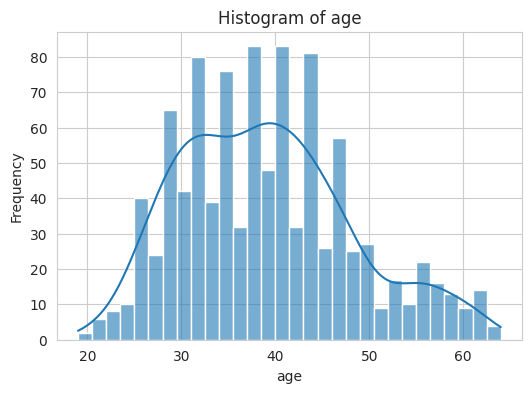

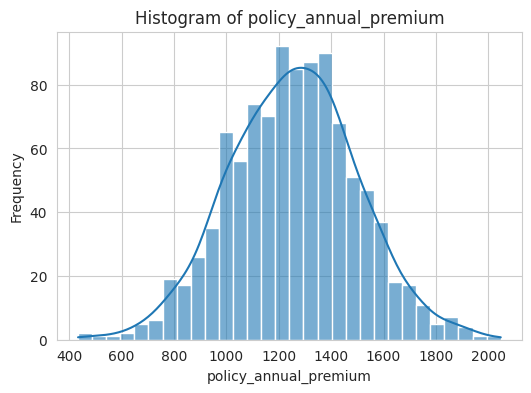

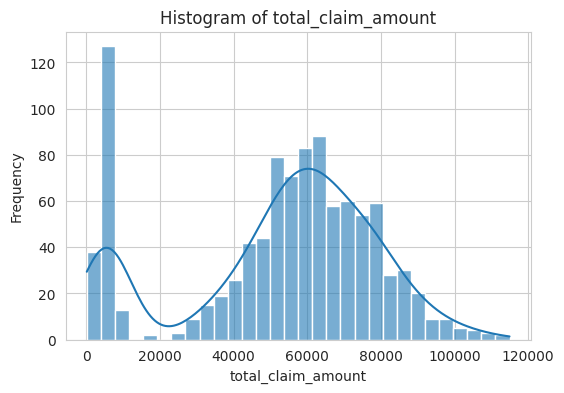

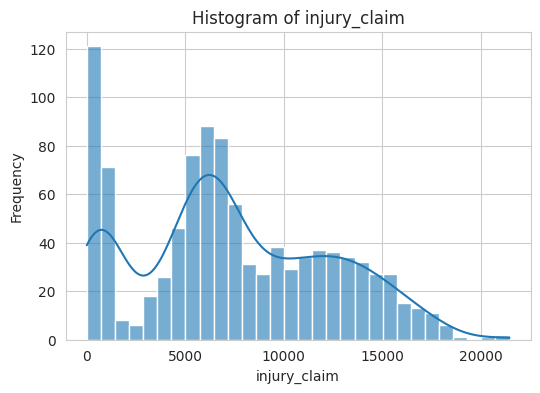

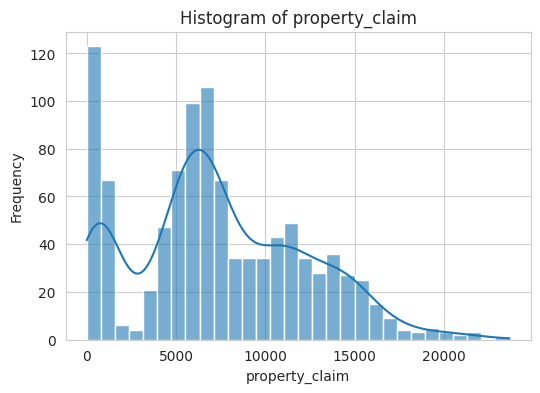

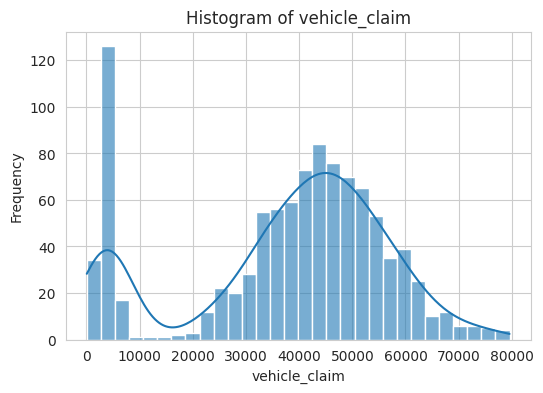

In [151]:
# Select numerical columns
num_cols = ["age", "policy_annual_premium", "total_claim_amount", 
            "injury_claim", "property_claim", "vehicle_claim"]

# Draw histograms
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(claims_df[col], kde=True, bins=30, alpha=0.6)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

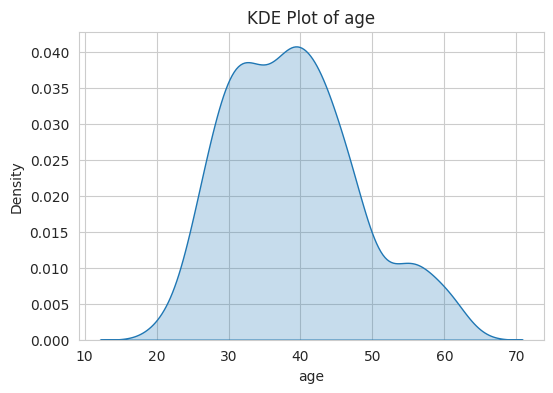

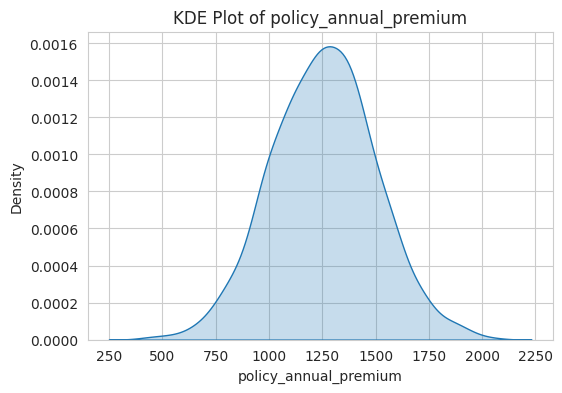

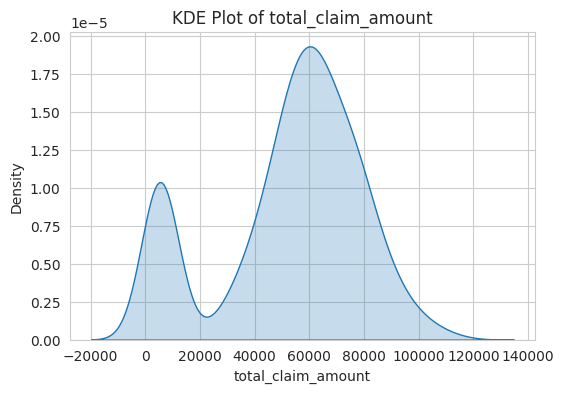

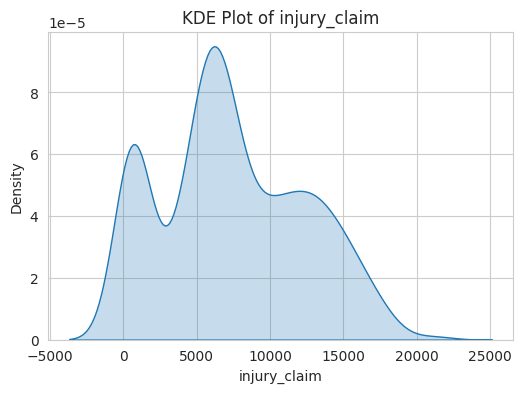

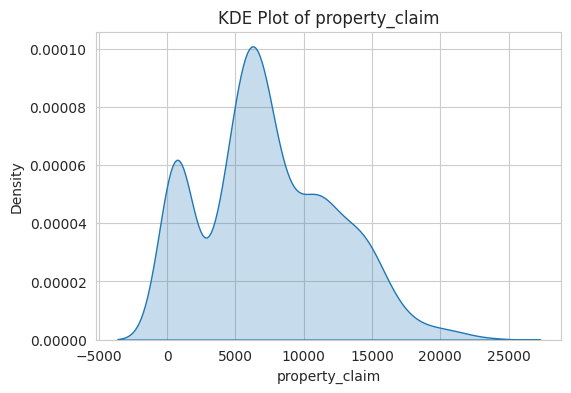

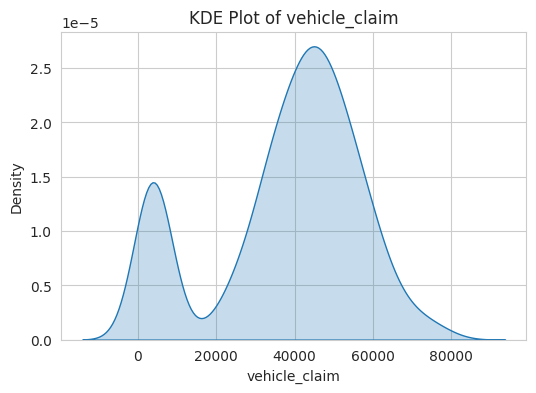

In [152]:
# Draw KDE plots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(claims_df[col], fill=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

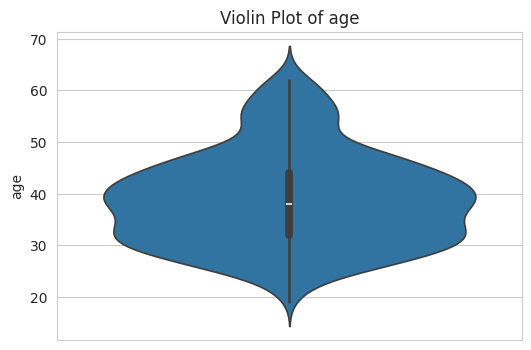

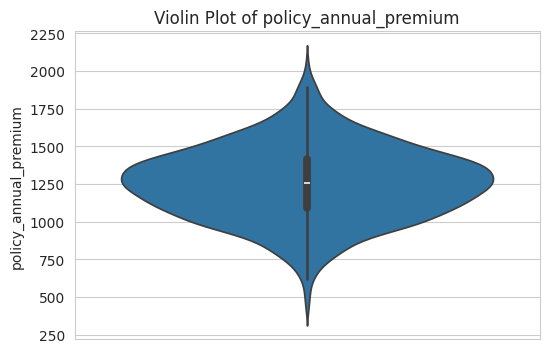

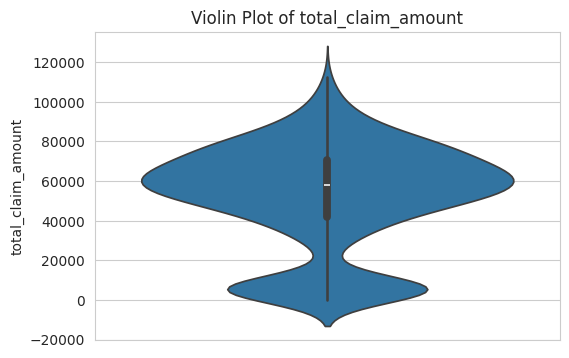

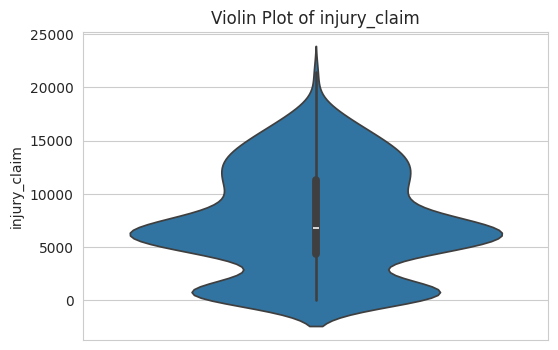

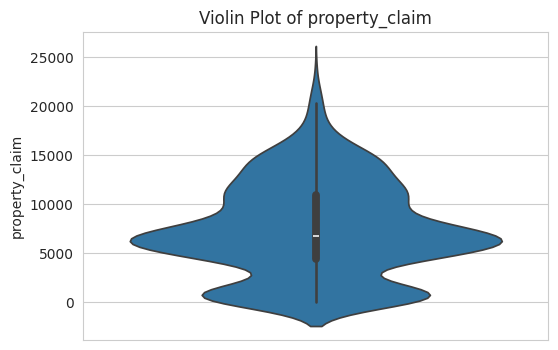

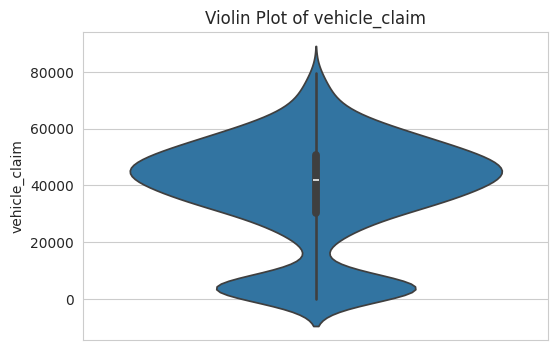

In [153]:
# Draw violin plots for numerical features
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=claims_df[col])
    plt.title(f"Violin Plot of {col}")
    plt.ylabel(col)
    plt.show()

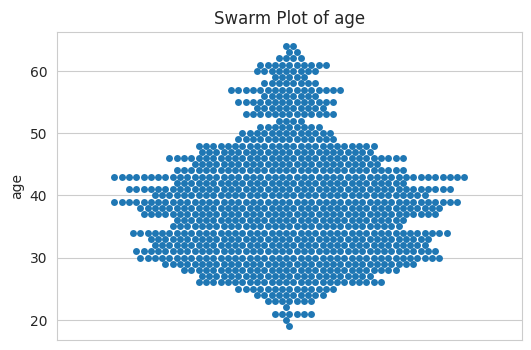

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


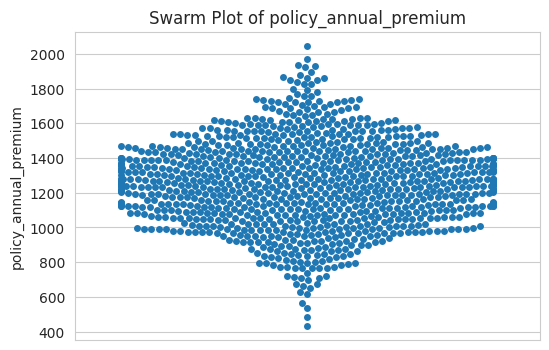

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


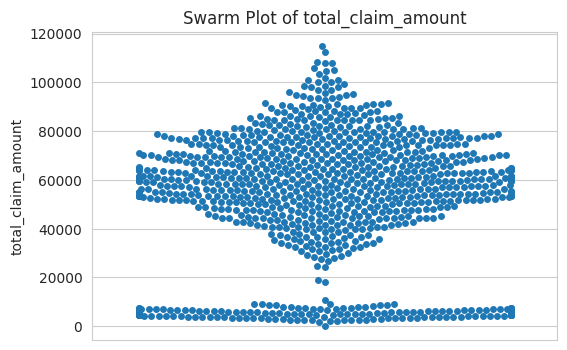

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


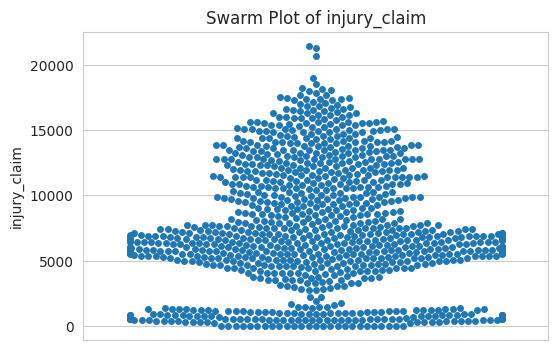

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


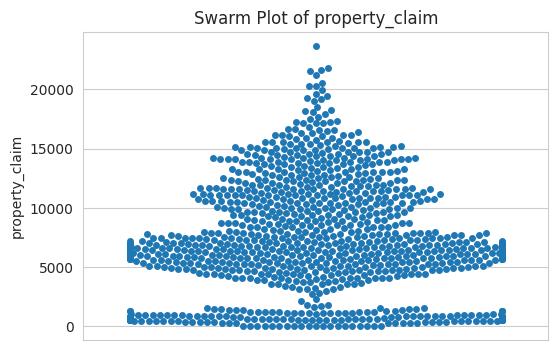

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


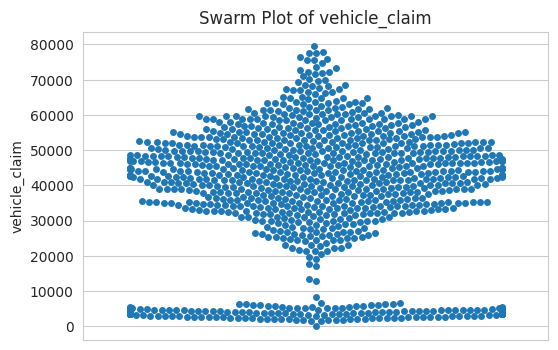

In [154]:
# Draw swarm plots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.swarmplot(y=claims_df[col]) 
    plt.title(f"Swarm Plot of {col}")
    plt.ylabel(col)
    plt.show()

**2.2 Draw grouped histograms**

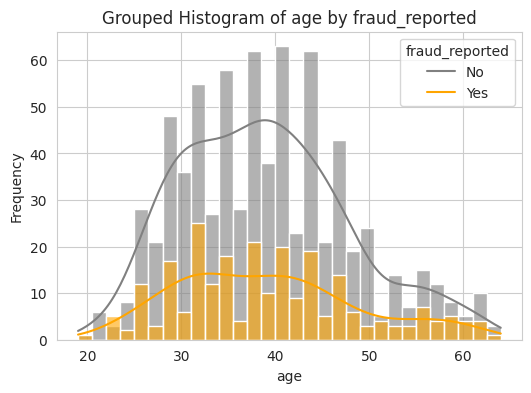

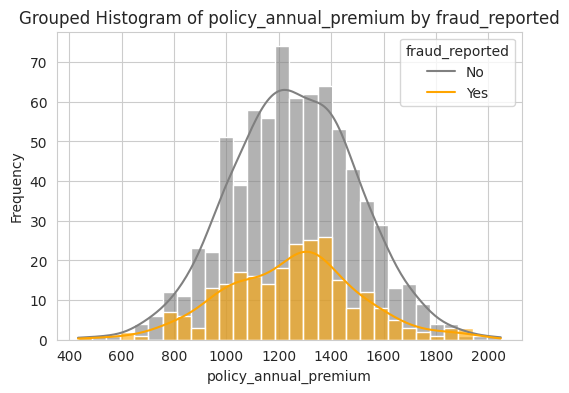

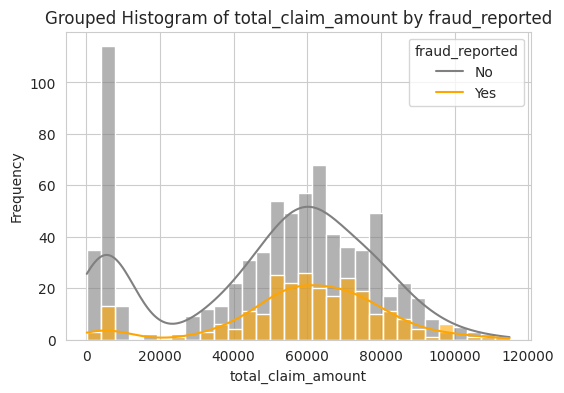

In [155]:
# Convert fraud_reported to string for visualization
claims_df["fraud_reported"] = claims_df["fraud_reported"].astype(str)

# Define numerical columns to plot
numerical_cols = ["age", "policy_annual_premium", "total_claim_amount"]
group_col = "fraud_reported" 

# Draw grouped histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=claims_df, x=col, hue=group_col, kde=True, bins=30, alpha=0.6, palette={"Y": "orange", "N": "gray"})
    plt.title(f"Grouped Histogram of {col} by {group_col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(labels=[ "No", "Yes"], title=group_col)
    plt.show()

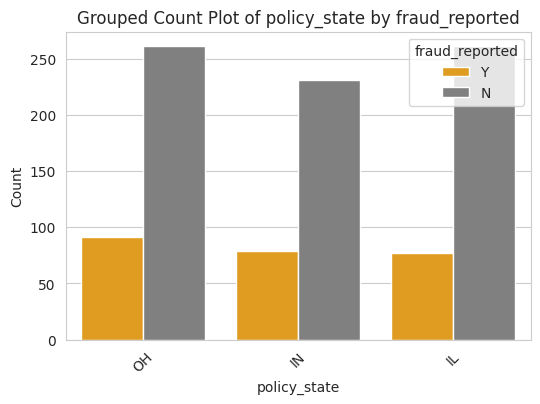

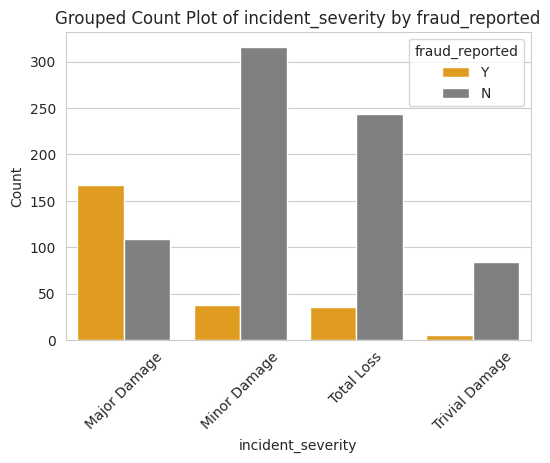

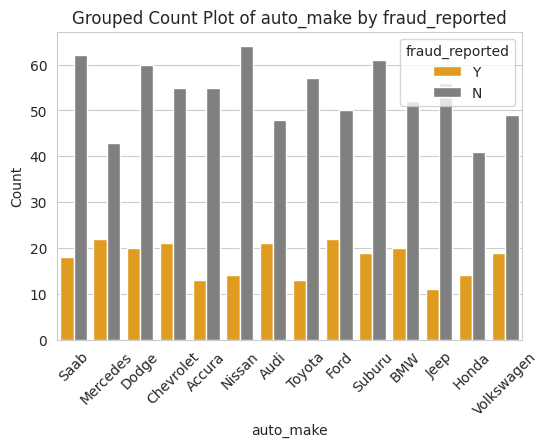

In [156]:
# Define categorical columns
categorical_cols = ["policy_state", "incident_severity", "auto_make"]

# Draw grouped bar charts for categorical columns with fixed colors
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=claims_df, x=col, hue=group_col, palette={"Y": "orange", "N": "gray"})
    plt.title(f"Grouped Count Plot of {col} by {group_col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title=group_col)
    plt.xticks(rotation=45) 
    plt.show()


**2.3 Draw a bar plot to indicate total counts of each categorical variable in a given column**

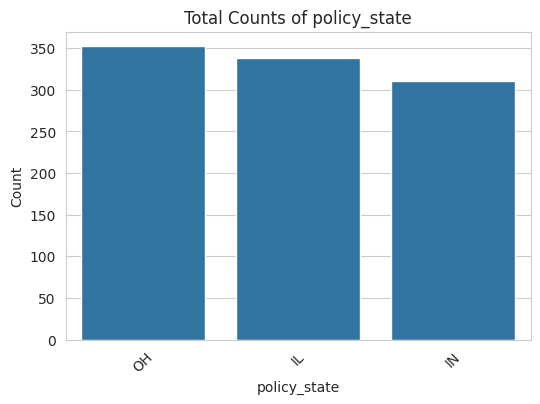

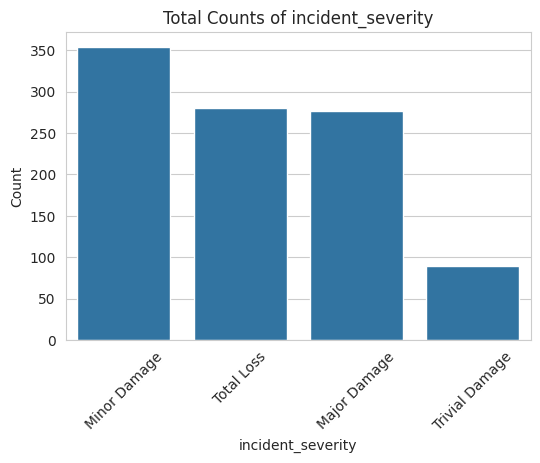

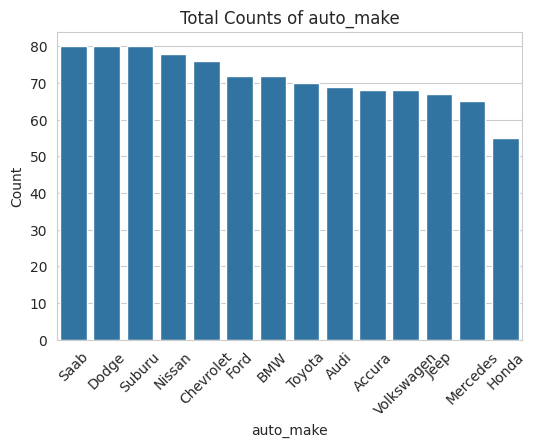

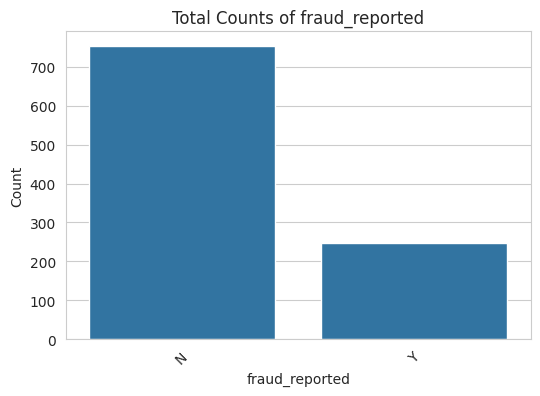

In [157]:
# Define categorical columns for total counts
categorical_cols = ["policy_state", "incident_severity", "auto_make", "fraud_reported"]

# Draw bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=claims_df, x=col, order=claims_df[col].value_counts().index)
    plt.title(f"Total Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45) 
    plt.show()


**2.4 Means, medians, and modes**

In [158]:
# Separate numerical and categorical columns 
numerical_cols = claims_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = claims_df.select_dtypes(include=['object']).columns

# Mean, median, and mode for numerical columns
numerical_stats = pd.DataFrame({
    "Mean": claims_df[numerical_cols].mean(),
    "Median": claims_df[numerical_cols].median(),
    "Mode": claims_df[numerical_cols].mode().iloc[0] 
})

# Mode for categorical columns
categorical_modes = claims_df[categorical_cols].mode().iloc[0] 

print("Numerical Statistics:")
print(numerical_stats)

print("\nCategorical Modes:")
print(categorical_modes.to_frame(name="Mode"))

Numerical Statistics:
                                     Mean    Median       Mode
months_as_customer           2.039540e+02     199.5     194.00
age                          3.894800e+01      38.0      43.00
policy_number                5.462386e+05  533135.0  100804.00
policy_deductable            1.136000e+03    1000.0    1000.00
policy_annual_premium        1.256406e+03    1257.2    1073.83
umbrella_limit               1.101000e+06       0.0       0.00
insured_zip                  5.012145e+05  466445.5  431202.00
capital-gains                2.512610e+04       0.0       0.00
capital-loss                -2.679370e+04  -23250.0       0.00
incident_hour_of_the_day     1.164400e+01      12.0      17.00
number_of_vehicles_involved  1.839000e+00       1.0       1.00
bodily_injuries              9.920000e-01       1.0       0.00
witnesses                    1.487000e+00       1.0       1.00
total_claim_amount           5.276194e+04   58055.0   59400.00
injury_claim                 7.43

### Conclusions for Insurance Claims Dataset:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

**Answer:** The dataset appears comprehensive and contains a mix of numerical and categorical variables relevant to insurance claims and fraud detection. The presence of important features such as policy_details, claim_amounts, vehicle_information, and fraud_reports makes it suitable for further analysis. Some missing values were identified, primarily in collision_type, property_damage, and police_report_available, but they were handled by replacing "?" with "Unknown" to retain all records without introducing bias. Same was done for authorities_contacted: the missing values were replaced with "Unknown".

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

**Answer:** The dataset includes a mix of normal, skewed, and bimodal distributions, meaning different variables may require different modeling approaches. For example, the age column follows a relatively normal distribution with a slight right skew, as most ages are clustered around 30-45. The same applies to policy_annual_premium, which is approximately normal with a peak around 1,000-1,400, also showing a slight right skew, though to a lesser extent. On the other hand, the distribution of injury_claim and property_claim can be considered bimodal because they highlight two distinct peaks around specific values. Vehicle_claim is close the former two but shows a clear right-skew, with most claims concentrated in lower values and fewer extreme high-value claims. The total_claim_amount distribution is right-skewed too, with a peak at lower values and a long tail extending toward higher claim amounts, which indicates that most claims are relatively small, while fewer cases involve exceptionally large claims.

- Are there any outliers present?  (Data points that are far from the others.)

**Answer:** The dataset has high-end outliers in policy_premiums and claim_amounts. These may represent legitimate large claims but could also indicate potential fraudulent cases. The columns with missing values could also be considered noteworthy anomalies since they represent a significant portion of the dataset. Missing information in key fields like collision_type, property_damage, and police_report_available may be relevant for detecting fraudulent cases, as incomplete or omitted data could indicate suspicious claims.

- If there are multiple related histograms, how does the distribution change across different groups?

**Answer:** The dataset contains multiple related histograms, such as total_claim_amount and its components (injury_claim, property_claim, and vehicle_claim). These distributions shift based on fraud status, with fraudulent claims often showing higher peaks in total claim amount. Also, Age and policy_premium distributions appear related, but they do not show significant shifts across fraud and non-fraud groups.

- What are the minimum and maximum values represented in each histogram?

**Answer:**

Age: min = 19 max = 64.

Policy_annual_remium: min = 433.33 max = 2,047.59.

Total_claim_amount: min = 100 max = 114,920.

Injury_claim: min = 0 max = 21,450.

Property_claim: min = 0 max = 23,670.

Vehicle_claim: min = 70 max = 79,560.


- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

**Answer:**

Adjusting bin sizes affects how the data is visualized. Total_claim_amount is a good example for testing different bin sizes because it has a wide range of values and is directly relevant to fraud detection - fraudulent claims often involve higher or unusual amounts. Larger bins (10) smooth out details but may hide small peaks, while smaller bins (50) reveal finer patterns but also introduce noise. For this dataset, using 30 bins provides a balanced view of claim distributions without oversimplifying or adding unnecessary granularity.





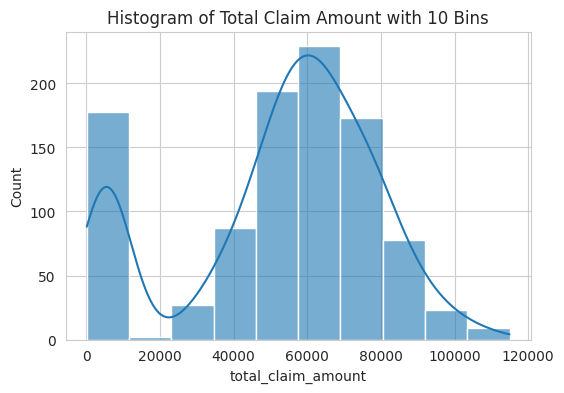

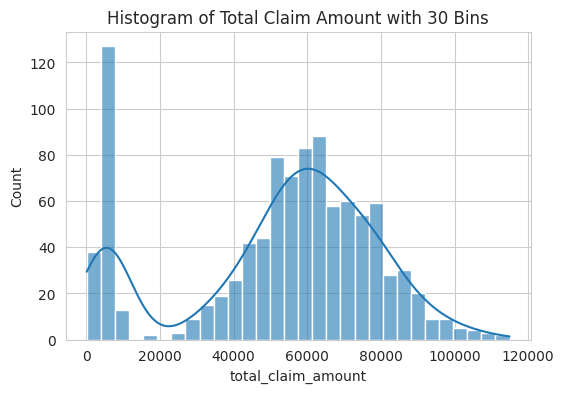

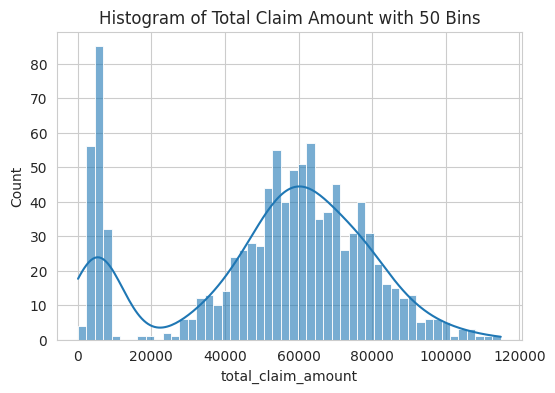

In [159]:
# 10 bins
plt.figure(figsize=(6, 4))
sns.histplot(data=claims_df, x="total_claim_amount", kde=True, bins=10, alpha=0.6)
plt.title("Histogram of Total Claim Amount with 10 Bins")
plt.show()

# 30 bins
plt.figure(figsize=(6, 4))
sns.histplot(data=claims_df, x="total_claim_amount", kde=True, bins=30, alpha=0.6)
plt.title("Histogram of Total Claim Amount with 30 Bins")
plt.show()

# 50 bins
plt.figure(figsize=(6, 4))
sns.histplot(data=claims_df, x="total_claim_amount", kde=True, bins=50, alpha=0.6)
plt.title("Histogram of Total Claim Amount with 50 Bins")
plt.show()


- Does the distribution appear normal, or does it have a different distribution?

**Answer:**

Age: Roughly normal, slight right skew.

Policy_annual_remium: Nearly normal, slight right skew.

total_claim_amount: Tight-skewed, with a peak at lower values and a long tail extending toward higher claim amounts.

Injury_claim and property_claim: Appear bimodal because they highlight two distinct peaks around specific values.

Vehicle_claim: Is close to injury_claim and property_claim but shows a clear right-skew, with most claims concentrated in lower values and fewer extreme high-value claims.

In [168]:
# The dataset is updated to reflect the changes related to addressing "?" and "0" values described in Cells 144 and 146.
df.to_pickle("claims_df_updated.pkl")

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

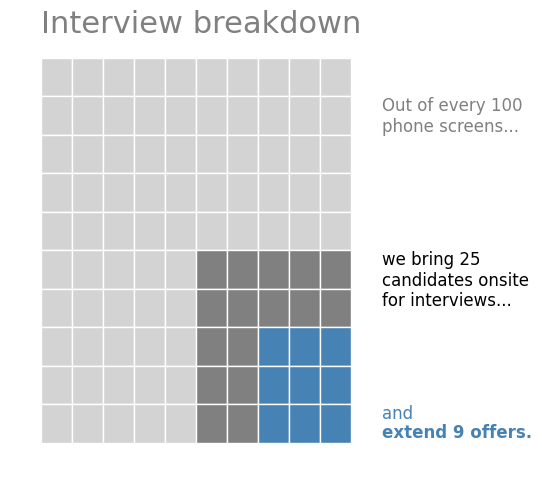

In [160]:
# Define grid size
rows, cols = 10, 10
grid = np.full((rows, cols), "lightgray")  
grid[5:10, 5:10] = "gray"  
grid[7:10, 7:10] = "steelblue"  

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Draw squares
for i in range(rows):
    for j in range(cols):
        ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color=grid[i, j], ec="white"))

# Text
plt.text(11, 9, "Out of every 100\nphone screens...", fontsize=12, color="gray", va="top")
plt.text(11, 5, "we bring 25\ncandidates onsite\nfor interviews...", fontsize=12, color="black", va="top")
plt.text(11, 1, "and", fontsize=12, color="steelblue", va="top")
plt.text(11, 0.5, "extend 9 offers.", fontsize=12, color="steelblue", fontweight="bold", va="top")
plt.text(0, 10.5, "Interview breakdown", fontsize=22, color="gray", va="bottom")

plt.xlim(-1, 14)
plt.ylim(-1, 11)
plt.show()